<a href="https://colab.research.google.com/github/eslamdyab21/A-B-test-to-an-e-commerce-website/blob/main/Oil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df4 = pd.read_csv('https://factpages.npd.no/ReportServer_npdpublic?/FactPages/tableview/field_reserves&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&IpAddress=not_used&CultureCode=en&rs:Format=CSV&Top100=false')

In [2]:
df2 = pd.read_csv('https://factpages.npd.no/ReportServer_npdpublic?/FactPages/tableview/field_in_place_volumes&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&IpAddress=not_used&CultureCode=en&rs:Format=CSV&Top100=false')

In [3]:
df4.head()

,fldName,fldRecoverableOil,fldRecoverableGas,fldRecoverableNGL,fldRecoverableCondensate,fldRecoverableOE,fldRemainingOil,fldRemainingGas,fldRemainingNGL,fldRemainingCondensate,fldRemainingOE,fldDateOffResEstDisplay,fldNpdidField,DatesyncNPD
0,ALBUSKJELL,7.35,15.53,0.99,0.0,24.76,0.00,0.00,0.0,0.0,0.00,31.12.2020,43437,12.07.2021
1,ALVE,2.46,9.69,1.49,0.0,14.98,0.33,2.25,0.3,0.0,3.15,31.12.2020,4444332,12.07.2021
2,ALVHEIM,53.70,10.50,0.00,0.0,64.20,8.74,3.99,0.0,0.0,12.73,31.12.2020,2845712,12.07.2021
3,ATLA,0.40,1.40,0.00,0.0,1.80,0.00,0.00,0.0,0.0,0.00,31.12.2020,21106284,12.07.2021
4,BALDER,106.59,3.08,0.00,0.0,109.67,34.99,1.12,0.0,0.0,36.11,31.12.2020,43562,12.07.2021


In [4]:
df4.shape

(123, 14)

In [5]:
df2.head()

,fldName,fldInplaceOil,fldInplaceAssLiquid,fldInplaceAssGas,fldInplaceFreeGas,fldDateOffResEstDisplay,fldNpdidField,DatesyncNPD
0,ALBUSKJELL,56.00,0.0,64.00,0.00,31.12.2020,43437,12.07.2021
1,ALVE,3.00,2.5,1.10,13.50,31.12.2020,4444332,12.07.2021
2,ALVHEIM,110.67,0.0,10.57,11.69,31.12.2020,2845712,12.07.2021
3,ATLA,0.44,0.0,0.00,1.88,31.12.2020,21106284,12.07.2021
4,BALDER,263.20,0.0,14.33,0.00,31.12.2020,43562,12.07.2021


In [6]:
df_fldInplaceOil = df4[['fldName','fldRecoverableOil']]

In [7]:
df_fldInplaceOil.head()

,fldName,fldRecoverableOil
0,ALBUSKJELL,7.35
1,ALVE,2.46
2,ALVHEIM,53.70
3,ATLA,0.40
4,BALDER,106.59


In [8]:
df2['fldInplaceOil'].value_counts

<bound method IndexOpsMixin.value_counts of 0       56.00
1        3.00
2      110.67
3        0.44
4      263.20
        ...  
118      0.00
119      1.38
120      0.00
121    192.25
122      0.00
Name: fldInplaceOil, Length: 123, dtype: float64>

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fldName                  123 non-null    object 
 1   fldInplaceOil            123 non-null    float64
 2   fldInplaceAssLiquid      123 non-null    float64
 3   fldInplaceAssGas         123 non-null    float64
 4   fldInplaceFreeGas        123 non-null    float64
 5   fldDateOffResEstDisplay  123 non-null    object 
 6   fldNpdidField            123 non-null    int64  
 7   DatesyncNPD              123 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 7.8+ KB


In [10]:
df2.shape

(123, 8)

In [11]:
df2[df2['fldInplaceOil'] == 0]

,fldName,fldInplaceOil,fldInplaceAssLiquid,fldInplaceAssGas,fldInplaceFreeGas,fldDateOffResEstDisplay,fldNpdidField,DatesyncNPD
14,DVALIN,0.0,0.60,0.0,25.45,31.12.2020,29393934,12.07.2021
37,GUNGNE,0.0,15.47,0.0,19.62,31.12.2020,43464,12.07.2021
43,HULDRA,0.0,9.30,0.0,22.70,31.12.2020,97002,12.07.2021
45,ISLAY,0.0,0.02,0.0,0.21,31.12.2020,21105675,12.07.2021
53,KVITEBJØRN,0.0,67.55,0.0,151.60,31.12.2020,1036101,12.07.2021
57,MARULK,0.0,1.70,0.0,13.10,31.12.2020,18212090,12.07.2021
58,MIKKEL,0.0,18.60,4.2,42.70,31.12.2020,1630514,12.07.2021
63,NORDØST FRIGG,0.0,0.12,0.0,35.10,31.12.2020,43568,12.07.2021
68,ORMEN LANGE,0.0,37.00,0.2,398.00,31.12.2020,2762452,12.07.2021
73,REV,0.0,1.60,0.0,3.60,31.12.2020,4467554,12.07.2021


In [12]:
df2[df2['fldInplaceOil'] == 0].shape

(20, 8)

In [13]:
df2['fldInplaceOil'][df2['fldInplaceOil'] != 0].min()

0.44

In [14]:
(20/123)*100

16.260162601626014

In [15]:
df2['fldInplaceOil'].min()

0.0

In [16]:
# merge df2 with df_fldInplaceOil
df2 = pd.merge(df2, df_fldInplaceOil, on='fldName')

In [17]:
df2.head()

,fldName,fldInplaceOil,fldInplaceAssLiquid,fldInplaceAssGas,fldInplaceFreeGas,fldDateOffResEstDisplay,fldNpdidField,DatesyncNPD,fldRecoverableOil
0,ALBUSKJELL,56.00,0.0,64.00,0.00,31.12.2020,43437,12.07.2021,7.35
1,ALVE,3.00,2.5,1.10,13.50,31.12.2020,4444332,12.07.2021,2.46
2,ALVHEIM,110.67,0.0,10.57,11.69,31.12.2020,2845712,12.07.2021,53.70
3,ATLA,0.44,0.0,0.00,1.88,31.12.2020,21106284,12.07.2021,0.40
4,BALDER,263.20,0.0,14.33,0.00,31.12.2020,43562,12.07.2021,106.59


In [18]:
df2['fldInplaceOil'].min()

0.0

In [19]:
df2 = df2[df2['fldInplaceOil'] !=0]

In [20]:
df2['fldInplaceOil'].min()

0.44

In [21]:
df2['RF'] = (df2['fldRecoverableOil'])/(df2['fldInplaceOil'])

In [22]:
df2.head(15)

,fldName,fldInplaceOil,fldInplaceAssLiquid,fldInplaceAssGas,fldInplaceFreeGas,fldDateOffResEstDisplay,fldNpdidField,DatesyncNPD,fldRecoverableOil,RF
0,ALBUSKJELL,56.00,0.00,64.00,0.00,31.12.2020,43437,12.07.2021,7.35,0.131250
1,ALVE,3.00,2.50,1.10,13.50,31.12.2020,4444332,12.07.2021,2.46,0.820000
2,ALVHEIM,110.67,0.00,10.57,11.69,31.12.2020,2845712,12.07.2021,53.70,0.485226
3,ATLA,0.44,0.00,0.00,1.88,31.12.2020,21106284,12.07.2021,0.40,0.909091
4,BALDER,263.20,0.00,14.33,0.00,31.12.2020,43562,12.07.2021,106.59,0.404977
5,BAUGE,20.20,0.00,6.10,0.00,31.12.2020,29446221,12.07.2021,8.01,0.396535
6,BLANE,2.68,0.00,0.00,0.00,31.12.2020,3437650,12.07.2021,0.88,0.328358
7,BRAGE,158.30,12.51,15.92,4.80,31.12.2020,43651,12.07.2021,62.56,0.395199
8,BRYNHILD,5.70,0.00,0.18,0.00,31.12.2020,21123063,12.07.2021,0.49,0.085965
9,BYRDING,6.59,0.00,1.25,0.62,31.12.2020,28975067,12.07.2021,1.01,0.153263


In [23]:
df2.shape

(103, 10)

In [24]:
df2['RF'].max

<bound method Series.max of 0      0.131250
1      0.820000
2      0.485226
3      0.909091
4      0.404977
         ...   
115    0.567742
116    0.543850
117    0.326825
119    0.224638
121    0.551417
Name: RF, Length: 103, dtype: float64>

In [25]:
df2['fldRecoverableOil'].min()

0.0

In [26]:
df2[df2['fldRecoverableOil'] == 0].shape

(2, 10)

In [27]:
df2 = df2[df2['fldRecoverableOil'] !=0]

In [28]:
df2[df2['fldRecoverableOil'] == 0].shape

(0, 10)

In [29]:
df2['fldRecoverableOil'].min()

0.02

In [30]:
import numpy as np
df2['fldRecoverableOil_log10'] = np.log10(df2['fldRecoverableOil'])

In [31]:
df2.head(15)

,fldName,fldInplaceOil,fldInplaceAssLiquid,fldInplaceAssGas,fldInplaceFreeGas,fldDateOffResEstDisplay,fldNpdidField,DatesyncNPD,fldRecoverableOil,RF,fldRecoverableOil_log10
0,ALBUSKJELL,56.00,0.00,64.00,0.00,31.12.2020,43437,12.07.2021,7.35,0.131250,0.866287
1,ALVE,3.00,2.50,1.10,13.50,31.12.2020,4444332,12.07.2021,2.46,0.820000,0.390935
2,ALVHEIM,110.67,0.00,10.57,11.69,31.12.2020,2845712,12.07.2021,53.70,0.485226,1.729974
3,ATLA,0.44,0.00,0.00,1.88,31.12.2020,21106284,12.07.2021,0.40,0.909091,-0.397940
4,BALDER,263.20,0.00,14.33,0.00,31.12.2020,43562,12.07.2021,106.59,0.404977,2.027716
5,BAUGE,20.20,0.00,6.10,0.00,31.12.2020,29446221,12.07.2021,8.01,0.396535,0.903633
6,BLANE,2.68,0.00,0.00,0.00,31.12.2020,3437650,12.07.2021,0.88,0.328358,-0.055517
7,BRAGE,158.30,12.51,15.92,4.80,31.12.2020,43651,12.07.2021,62.56,0.395199,1.796297
8,BRYNHILD,5.70,0.00,0.18,0.00,31.12.2020,21123063,12.07.2021,0.49,0.085965,-0.309804
9,BYRDING,6.59,0.00,1.25,0.62,31.12.2020,28975067,12.07.2021,1.01,0.153263,0.004321


In [32]:
df_new = df2[['fldName','fldRecoverableOil','RF']]
df_new = df_new.reset_index(drop=True)

In [33]:
df_new.head()

,fldName,fldRecoverableOil,RF
0,ALBUSKJELL,7.35,0.131250
1,ALVE,2.46,0.820000
2,ALVHEIM,53.70,0.485226
3,ATLA,0.40,0.909091
4,BALDER,106.59,0.404977


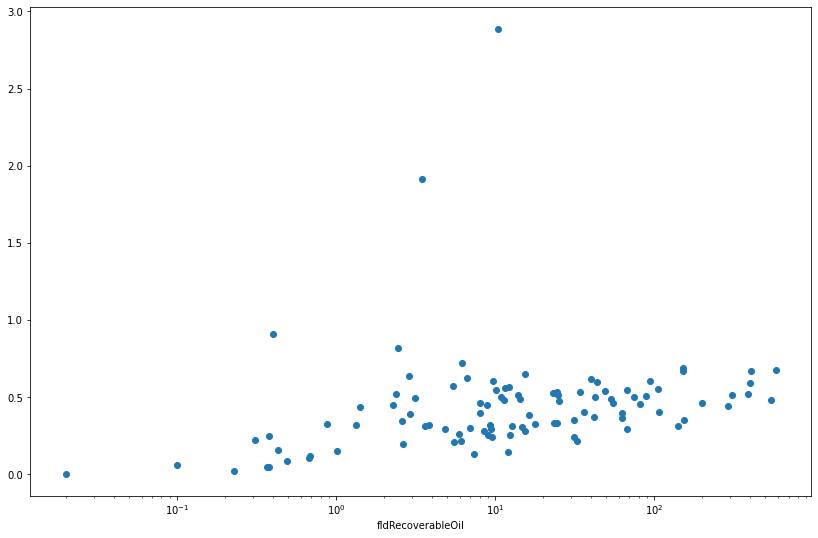

In [34]:
ax = df_new.set_index('fldRecoverableOil')['RF'].plot(style='o',figsize=(14,9))
ax.set_xscale('log')

In [35]:
# removing outliers from RF
df_new = df_new[df_new['RF'] <= 1]

In [36]:
df_new.shape

(99, 3)

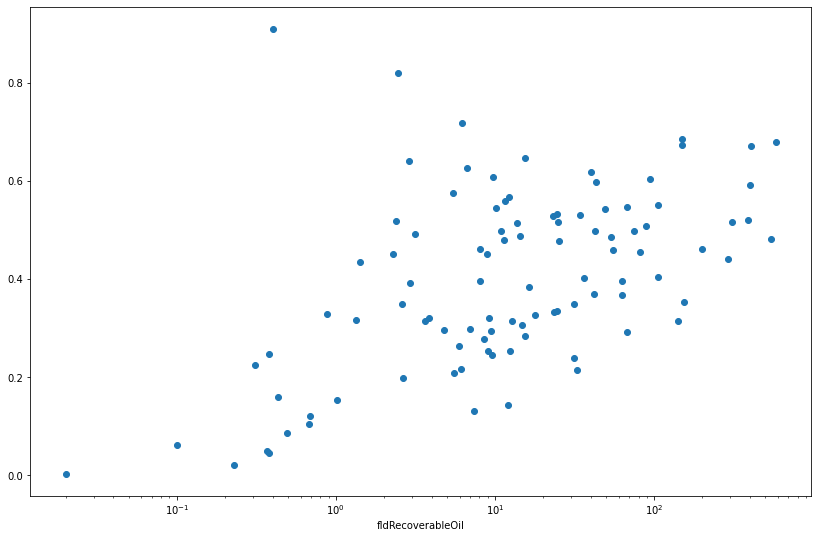

In [37]:
ax = df_new.set_index('fldRecoverableOil')['RF'].plot(style='o',figsize=(14,9))
ax.set_xscale('log')

In [38]:
df_new.rename(columns={'fldRecoverableOil': 'x', 'RF' : 'y','fldName':'val' }, inplace=True)

In [39]:
df_new.head()

,val,x,y
0,ALBUSKJELL,7.35,0.131250
1,ALVE,2.46,0.820000
2,ALVHEIM,53.70,0.485226
3,ATLA,0.40,0.909091
4,BALDER,106.59,0.404977


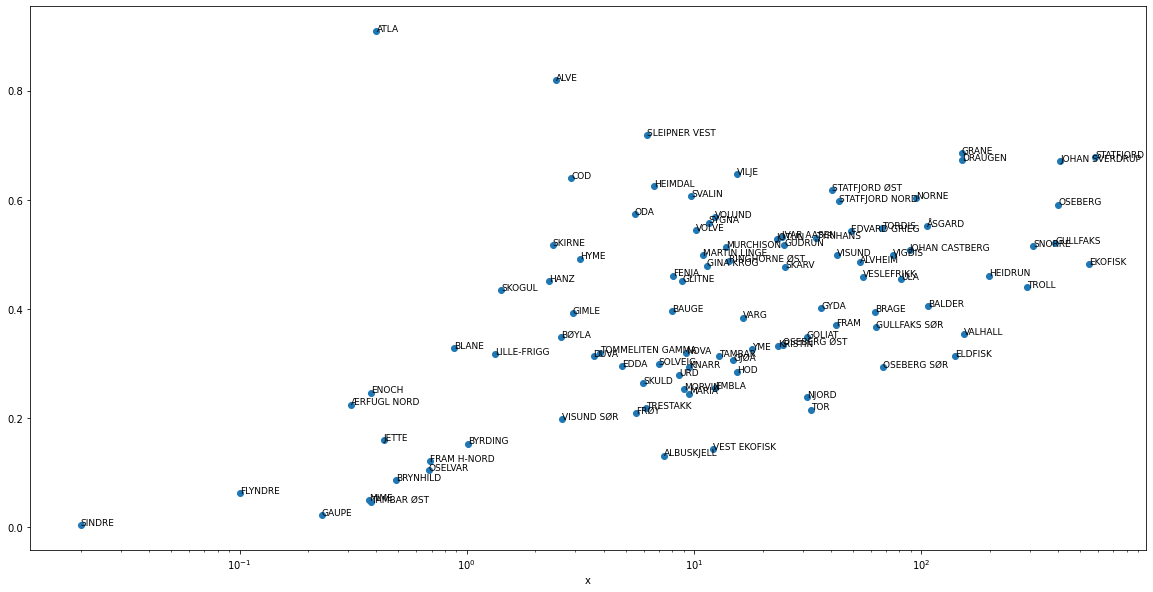

In [40]:
ax = df_new.set_index('x')['y'].plot(style='o',figsize=(20,10))

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']),fontsize=9)

label_point(df_new.x, df_new.y, df_new.val, ax)
ax.set_xscale('log')

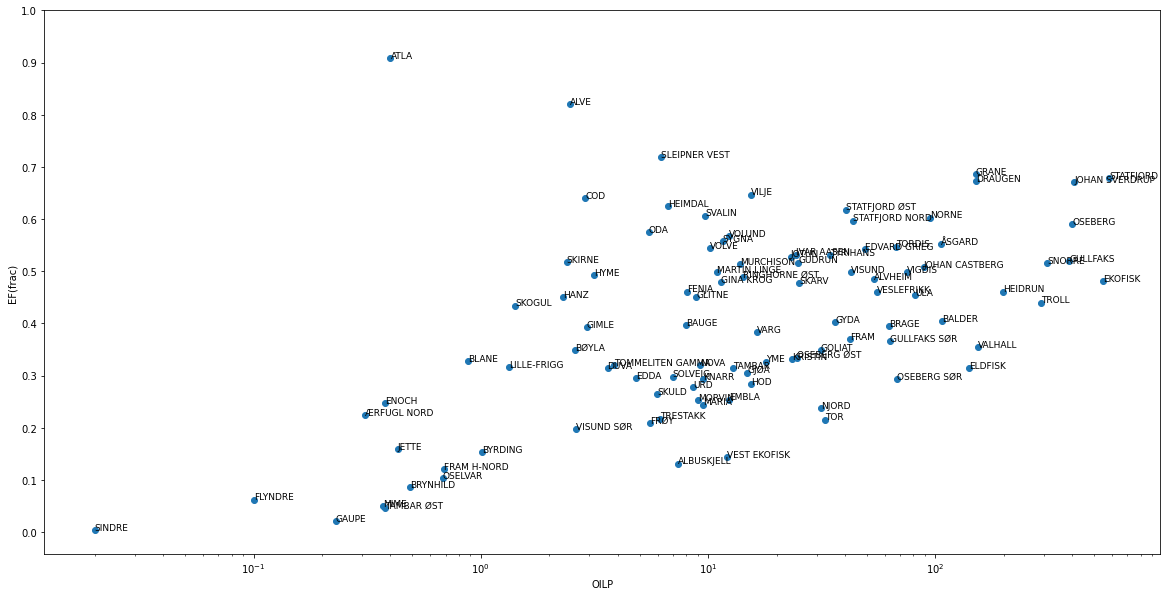

In [43]:
import matplotlib.pyplot as plt

ax = df_new.set_index('x')['y'].plot(style='o',figsize=(20,10))

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']),fontsize=9)

label_point(df_new.x, df_new.y, df_new.val, ax)
ytic = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
plt.yticks(ytic);
plt.xlabel('OILP');
plt.ylabel('EF(frac)');
ax.set_xscale('log')

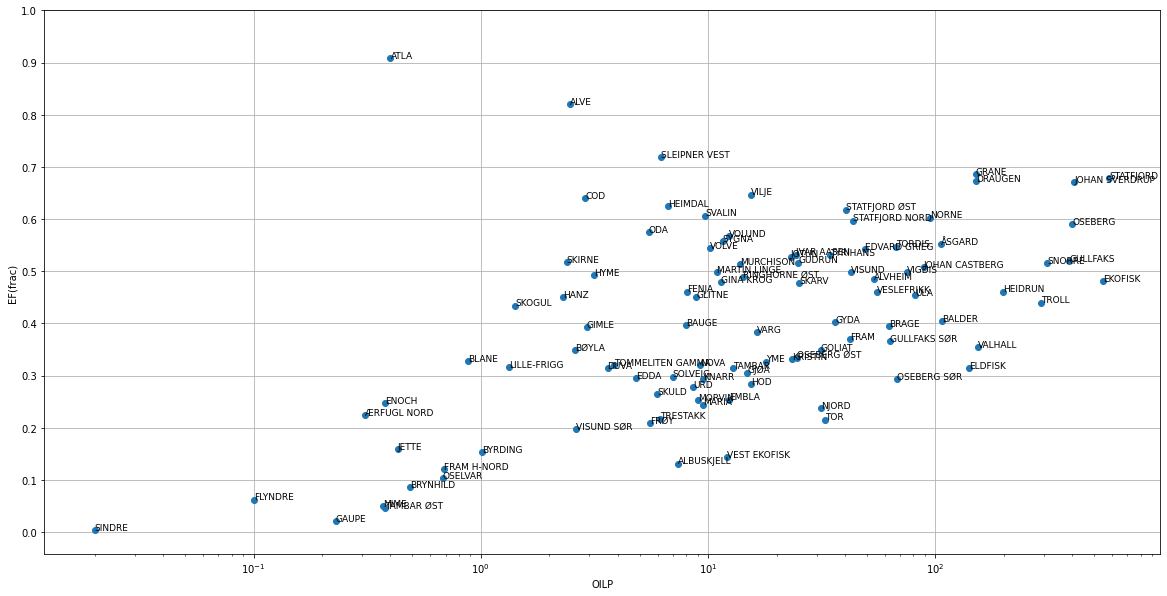

In [44]:
import matplotlib.pyplot as plt

ax = df_new.set_index('x')['y'].plot(style='o',figsize=(20,10))

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']),fontsize=9)

label_point(df_new.x, df_new.y, df_new.val, ax)
ytic = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
plt.yticks(ytic);
plt.xlabel('OILP');
plt.ylabel('EF(frac)');
ax.set_xscale('log')
plt.grid()